In [2]:
#pulling data from the front end of a website as a data scientist
#import all necessary data libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [4]:
url = "http://www.hubertiming.com/results/2018MLK"
html = urlopen(url)

In [5]:
#the soup is a html object from the page
soup = BeautifulSoup(html)

In [6]:
#check out your soup
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2018 MLK Dream Run!" property="og:title"/>
<meta content="Results of the 2018 MLK Dream Run at Soul District in Portland, OR" property="og:description"/>
<meta content="https://www.hubertiming.com/results/2018MLKDreamRun.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2018MLK" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Race results for the 2018 MLK Dream Run!</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.gallery.min.css" rel="stylesheet" type="te

In [8]:
#you can get title of the website
soup.title.text

'Race results for the 2018 MLK Dream Run!'

In [9]:
#you can get all the links on the page using find_all
for link in soup.find_all('a'):
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [34]:
#added .strip (not .split) to the text append to remove whitespaces and escape symbols
data = []
all_rows = soup.find_all("tr")
for row in all_rows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text.strip())
    data.append(dataRow)
data = data[5:]
print(data[-2:])

[['190', '2087', 'LEESHA POSEY', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '112 of 113', 'F 40-54', '36 of 37', '0:00', '1:33:53'], ['191', '1216', 'ZULMA OCHOA', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '113 of 113', 'F 40-54', '37 of 37', '0:00', '1:43:27']]


In [35]:
#explore the dataset
df = pd.DataFrame(data)
print(df)

      0     1                        2  3   4           5   6      7   \
0      1  1191             MAX RANDOLPH  M  29  WASHINGTON  DC   5:25   
1      2  1080  NEED NAME KAISER RUNNER  M  25    PORTLAND  OR   5:39   
2      3  1275               DAN FRANEK  M  52    PORTLAND  OR   5:53   
3      4  1223              PAUL TAYLOR  M  54    PORTLAND  OR   5:58   
4      5  1245              THEO KINMAN  M  22                   6:17   
..   ...   ...                      ... ..  ..         ...  ..    ...   
186  187  1254           CYNTHIA HARRIS  F  64    PORTLAND  OR  21:53   
187  188  1085           EBONY LAWRENCE  F  30    PORTLAND  OR  22:00   
188  189  1170         ANTHONY WILLIAMS  M  39    PORTLAND  OR  22:19   
189  190  2087             LEESHA POSEY  F  43    PORTLAND  OR  30:17   
190  191  1216              ZULMA OCHOA  F  40     GRESHAM  OR  33:22   

          8           9        10        11    12       13  
0      16:48     1 of 78  M 21-39   1 of 33  0:08    16:56  
1

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,5:39,17:31,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,M 21-39,3 of 33,0:09,19:40


In [37]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
186,187,1254,CYNTHIA HARRIS,F,64,PORTLAND,OR,21:53,1:07:51,110 of 113,F 55+,14 of 14,1:19,1:09:10
187,188,1085,EBONY LAWRENCE,F,30,PORTLAND,OR,22:00,1:08:12,111 of 113,F 21-39,53 of 53,0:58,1:09:10
188,189,1170,ANTHONY WILLIAMS,M,39,PORTLAND,OR,22:19,1:09:11,78 of 78,M 21-39,33 of 33,0:08,1:09:19
189,190,2087,LEESHA POSEY,F,43,PORTLAND,OR,30:17,1:33:53,112 of 113,F 40-54,36 of 37,0:00,1:33:53
190,191,1216,ZULMA OCHOA,F,40,GRESHAM,OR,33:22,1:43:27,113 of 113,F 40-54,37 of 37,0:00,1:43:27


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       194 non-null    object
 1   1       194 non-null    object
 2   2       191 non-null    object
 3   3       191 non-null    object
 4   4       191 non-null    object
 5   5       191 non-null    object
 6   6       191 non-null    object
 7   7       191 non-null    object
 8   8       191 non-null    object
 9   9       191 non-null    object
 10  10      191 non-null    object
 11  11      191 non-null    object
 12  12      191 non-null    object
 13  13      191 non-null    object
dtypes: object(14)
memory usage: 21.6+ KB


In [41]:
#list comprehension; alternative code
# header_list = []
# th = soup.find_all('th')
# for element in th:
#     header_list.append(element.text)
header_list = [i.text for i in soup.find_all('th')]
header_list

['Place',
 'Bib',
 'Name',
 'Gender',
 'Age',
 'City',
 'State',
 'Chip Pace',
 'Chip Time',
 'Gender Place',
 'Age Group',
 'Age Group Place',
 'Time to Start',
 'Gun Time']

In [42]:
#set the columns of the dataFrame
df.columns = header_list
print(df.head())

  Place   Bib                     Name Gender Age        City State Chip Pace  \
0     1  1191             MAX RANDOLPH      M  29  WASHINGTON    DC      5:25   
1     2  1080  NEED NAME KAISER RUNNER      M  25    PORTLAND    OR      5:39   
2     3  1275               DAN FRANEK      M  52    PORTLAND    OR      5:53   
3     4  1223              PAUL TAYLOR      M  54    PORTLAND    OR      5:58   
4     5  1245              THEO KINMAN      M  22                        6:17   

  Chip Time Gender Place Age Group Age Group Place Time to Start Gun Time  
0     16:48      1 of 78   M 21-39         1 of 33          0:08    16:56  
1     17:31      2 of 78   M 21-39         2 of 33          0:09    17:40  
2     18:15      3 of 78   M 40-54         1 of 27          0:07    18:22  
3     18:31      4 of 78   M 40-54         2 of 27          0:07    18:38  
4     19:31      5 of 78   M 21-39         3 of 33          0:09    19:40  


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Chip Time        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.0+ KB


In [44]:
df.shape

(191, 14)

In [111]:
#drop any null rows
df3= df.dropna(axis = 0)
df3.shape

(191, 14)

In [123]:
#sample stakeholder task: find relationship between the gender and chip time
df3.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,5:39,17:31,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,M 21-39,3 of 33,0:09,19:40


In [129]:
len(df3['Chip Time'].iloc[180])

7

In [130]:
#changed the string format to hhmmss or timedelta will raise ValueError if you use it on the raw dataset
def row_cat(x):
    if len(x) == 5:
        x = "00:" + x
    elif len(x) == 7:
        x = "0" + x
    return x
df3['Chip Time'] =df3['Chip Time'].apply(row_cat)

In [132]:
df3.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,00:16:48,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,5:39,00:17:31,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,00:18:15,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,00:18:31,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,6:17,00:19:31,5 of 78,M 21-39,3 of 33,0:09,19:40


In [166]:
print(df3[['Gender', 'Chip_time_minutes']].tail())


    Gender Chip_time_minutes
186      F   0 days 01:07:51
187      F   0 days 01:08:12
188      M   0 days 01:09:11
189      F   0 days 01:33:53
190      F   0 days 01:43:27


<BarContainer object of 191 artists>

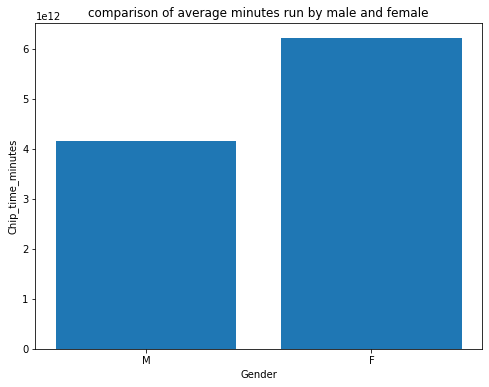

In [171]:
plt.figure(figsize=(8,6))

plt.bbox(borderaxespad = , loc = 2, bbox_to_break = (0,1))
plt.xlabel('Gender')
plt.ylabel('Chip_time_minutes')
plt.title("comparison of average minutes run by male and female")
plt.bar(df3['Gender'], df3['Chip_time_minutes'])

In [173]:
df3.describe(include = [np.number])

,Chip_time_minutes
count,191
mean,0 days 00:42:28.691099476
std,0 days 00:14:54.181815889
min,0 days 00:16:48
25%,0 days 00:29:02.500000
50%,0 days 00:39:30
75%,0 days 00:54:13
max,0 days 01:43:27


<AxesSubplot:title={'center':'Chip_time_minutes'}, xlabel='Gender'>

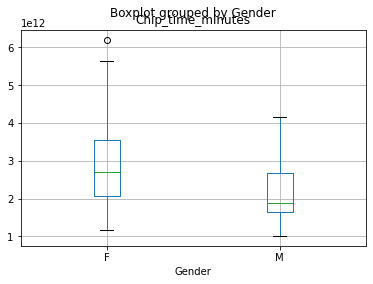

In [179]:
df3.boxplot(column = 'Chip_time_minutes', by = 'Gender')